In [3]:
import pandas as pd

In [5]:
df = pd.read_csv('COVID.csv')

In [ ]:
df.info()

In [ ]:
df.columns

In [ ]:
df.isnull().sum()

In [ ]:
df.describe().T

In [ ]:
df.describe(include="O").T

In [ ]:
#Gestión de nulos

#Nulos numéricos: Lat, long
#Nulos object: tweet location, tweet language, user bio

In [ ]:
(df.isnull().sum() / len(df)) * 100

In [ ]:
#Nulos numéricos: lat y long con más de un 90 % de nulos
#Solución: los eliminamos, ya que tenemos la ubicación en otra columna

In [7]:
df = df.drop(['Lat', 'Long'], axis=1)

In [ ]:
#Tweet Location: porcentaje alto de nulos, pero es una columna importante, no podemos borrarla

df["Tweet Location"].value_counts().sort_values()

In [ ]:
#Vemos que en esta columna hay ubicaciones que están mal o además del país pone la ciudad.
#Vamos a crear una función que sustituya ciudades por sus países y que busque el país en el texto, por si la persona ha escrito algo más

In [ ]:
pip install pycountry

In [8]:
import pycountry

In [ ]:

# Obtener una lista de nombres de países en inglés
country_list = [country.name for country in pycountry.countries]

cities = [
    "Madrid",           # España
    "Paris",            # Francia
    "Berlin",           # Alemania
    "Roma",             # Italia
    "東京",             # Tokio (Japón)
    "Beijing",          # Pekín (China)
    "Москва",           # Moscú (Rusia)
    "São Paulo",        # Brasil
    "मुंबई",            # Mumbai (India)
    "New York",         # Estados Unidos
    "Toronto",          # Canadá
    "서울",             # Seúl (Corea del Sur)
    "Ciudad de México", # México
    "Sydney",           # Australia
    "القاهرة",          # El Cairo (Egipto)
    "Cape Town",        # Sudáfrica
    "Buenos Aires",     # Argentina
    "الرياض",           # Riad (Arabia Saudita)
    "İstanbul",         # Estambul (Turquía)
    "Los Angeles",      # Estados Unidos
    "Milan",            # Italia
    "Bangkok",          # Tailandia
    "Sevilla",          # España
    "São Luís",         # Brasil
    "Lagos",            # Nigeria
    "Kuala Lumpur",     # Malasia
    "Jakarta",          # Indonesia
    "Delhi",            # India
    "Lima",             # Perú
    "Teherán",          # Irán
    "Cairo",            # Egipto
    "Hong Kong",        # China
    "Rio de Janeiro",   # Brasil
    "Shanghai",         # China
    "Bangalore",        # India
    "Barcelona",        # España
    "Lisbon",           # Portugal
    "Warsaw",           # Polonia
    "Istanbul",         # Turquía
    "Rome",             # Italia
    "Dubai",            # Emiratos Árabes Unidos
    "Moscow",           # Rusia
    "Mérida",           # Venezuela
    "La Guaira",        # Venezuela
    "Prague",           # República Checa
    "Georgetown",       # Guyana
    "Milano",           # Italia
    "Oklahoma",         # Estados Unidos
    "Dortmund",         # Alemania
    "Soria",            # España
    "Gran Canaria",     # España
    "Valencia",         # España
    "Cataluña",         # España
]


def extract_country_loc(location):
    if isinstance(location, str): 
        for country in country_list:
            if country.lower() in location.lower():
                return country
        for city in cities:
            if city.lower() in location.lower():
                return city
    return 'Unknown'
    


In [13]:
df['Country_Loc'] = df['Tweet Location'].apply(extract_country_loc)

In [9]:
pd.set_option('display.max_rows', None)

In [ ]:
df['Country_Loc'].value_counts()

In [ ]:
df.isnull().sum()

In [16]:
df = df.drop('Tweet Location', axis=1)

In [ ]:
df['Tweet Language'].value_counts()

In [ ]:
#Hay algunos idiomas mal escritos o que son simplemente siglas, esos, al no tener claro cuáles son, los vamos a sustituir por 'Unknown', al igual que los nulos.

In [18]:
def change_language(language):
    if len(language) <= 3:
        return 'Unknown'
    else:
        return language

In [21]:
df['Tweet Language'] = df['Tweet Language'].fillna('Unknown')

In [22]:
df['Tweet Language'] = df['Tweet Language'].apply(change_language)

In [ ]:
df['Tweet Language'].value_counts()

In [ ]:
#La Bio no podemos inferirla, es algo muy aleatorio, así que también la sustituimos por Unknown.

In [25]:
df['User Bio'] = df['User Bio'].fillna('Unknown')

In [ ]:
df.isnull().sum()

In [ ]:
#Solo hay 1 nombre nulo, así que hacemos lo mismo

In [27]:
df['Name'] = df['Name'].fillna('Unknown')

In [ ]:
df.info()

In [ ]:
#Guardamos los cambios

In [29]:
df.to_csv('final_csv.csv', index=False)

In [30]:
import matplotlib as plt

In [ ]:
#Revisamos los outliers de retweets y likes received

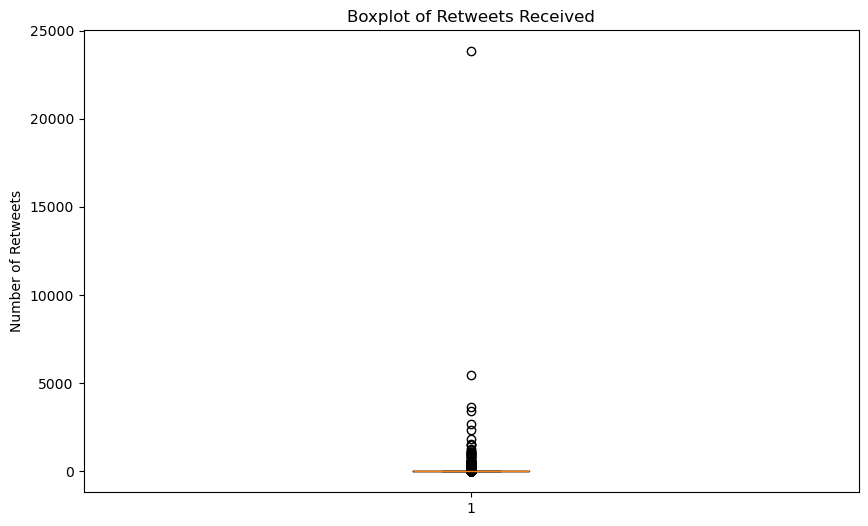

In [48]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['Retweets Received'])
plt.title('Boxplot of Retweets Received')
plt.ylabel('Number of Retweets')
plt.show()

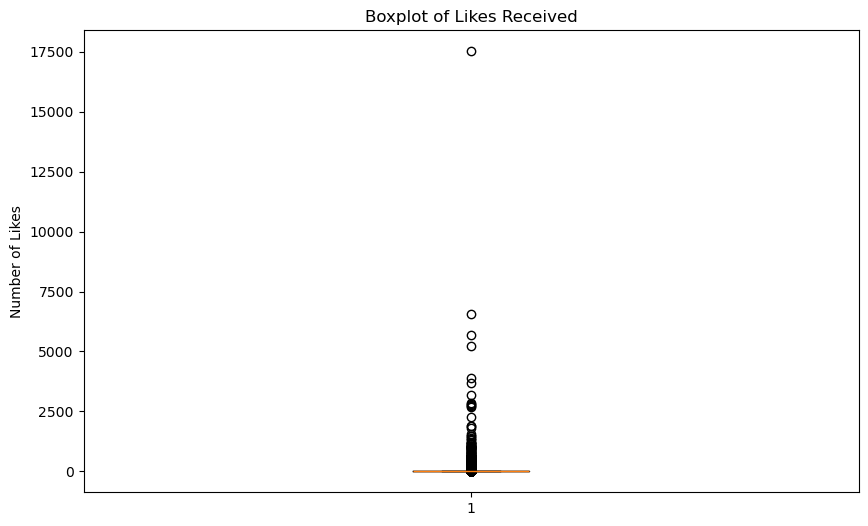

In [50]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['Likes Received'])
plt.title('Boxplot of Likes Received')
plt.ylabel('Number of Likes')
plt.show()

In [ ]:
#hacemos un wordcloud de las palabras más utilizadas

In [52]:
pip install wordcloud


   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/299.9 kB 393.8 kB/s eta 0:00:01
   ------------------- -------------------- 143.4/299.9 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 299.9/299.9 kB 1.9 MB/s eta 0:00:00


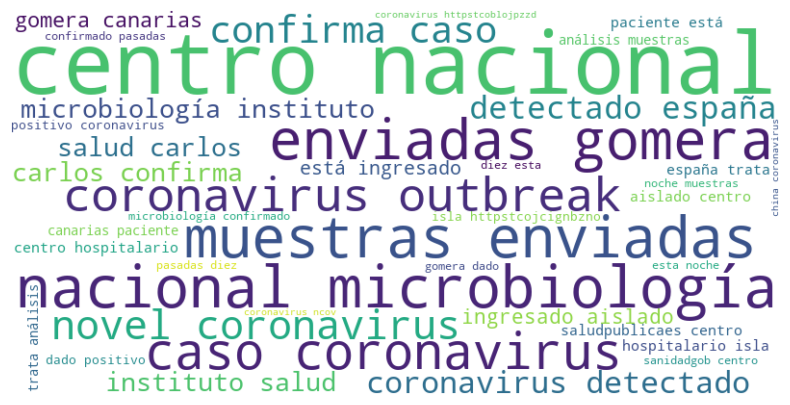

Las 20 palabras más comunes son:
coronavirus: 63349
china: 15287
wuhan: 8560
centro: 6120
people: 5243
virus: 5186
ncov: 4607
gomera: 4406
nacional: 4128
microbiología: 4019
outbreak: 3950
health: 3904
muestras: 3840
enviadas: 3832
caso: 3624
cases: 3521
salud: 3350
está: 3264
para: 3236
españa: 3078


In [ ]:
from wordcloud import WordCloud,STOPWORDS
from collections import Counter
import re

extra_stopwords = {'with', 'that', 'because', 'this', 'which', 'for', 'the', 'and', 'but', 'of', 'to', 'in', 'on', 'at', 'by', 'from', 'as', 'a', 'an', 'be', 'desde'}


def clean_text(text):
    text = text.lower()  # Pasar a minúsculas
    text = re.sub(r'[^a-záéíóúüñ\s]', '', text) 
    return text


df['cleaned_tweet_content'] = df['Tweet Content'].apply(clean_text)


all_tweets = ' '.join(df['cleaned_tweet_content'])

words = [
    word for word in all_tweets.split()
    if len(word) > 3 and word not in STOPWORDS and word not in extra_stopwords
]


wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white',
    max_font_size=100,  
    relative_scaling=0.5,  
    min_font_size=10  
).generate(' '.join(words))


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Quitar los ejes
plt.show()


word_counts = Counter(words) 


print("Las 20 palabras más comunes son:")
for word, count in word_counts.most_common(20):
    print(f"{word}: {count}")